# Demo of Multi-NMF-SO

###  [1] Motoki Shiga and Shunsuke Muto "XXX", XXX, 2017.

In [1]:
%matplotlib inline
import numpy as np
import scipy.io as sio
from libnmf import MultiNMF, MultiNMF_SO

# Generate a synthetic dataset with noise

In [2]:
#load theoretical data of Mn3O4 without noise
mat_dict = sio.loadmat('mn3o4_f2.mat')
ximage = mat_dict['datar']

# focusing channel
n_ch = np.arange(37-1,116);
ximage = ximage[:,:,n_ch];

# # of pixels along x and y axis, # of EELS channels
xdim,ydim,Nch = ximage.shape

#  generating pahtom data by adding gaussian noise
X = np.reshape(ximage, (xdim*ydim, Nch))
scale_spect = np.max(X)
s2_noise = 0.1  #noise variance
X = X + np.random.randn(xdim*ydim, Nch) * s2_noise * scale_spect;
X = (X + np.abs(X))/2;
scale_X = np.mean(X)
X = X / scale_X

X = [X,X]

# Multi-NMF-SO

In [5]:
# define and training model
nmf_so = MultiNMF_SO(n_components=2, wo=0.05, reps=3, max_itr=100)
nmf_so.fit(X, weight_source=[0.1,0.9], num_xy=(xdim,ydim), channel_vals=n_ch)

Training NMF with Soft Orthogonal constraint....
1th iteration of NMF-SO algorithm
2th iteration of NMF-SO algorithm
3th iteration of NMF-SO algorithm


MultiNMF_SO(n_components=2weight_source=[0.1, 0.9], wo=0.05, reps=3, max_itr=100, random_seed=0)

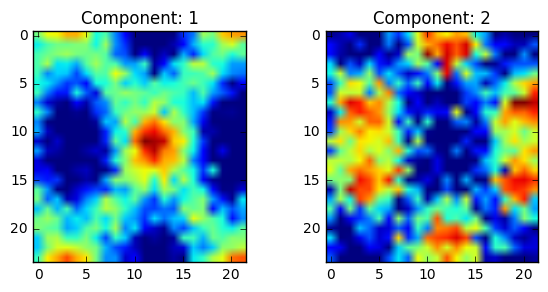

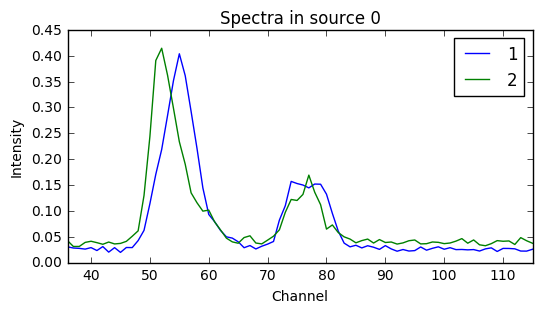

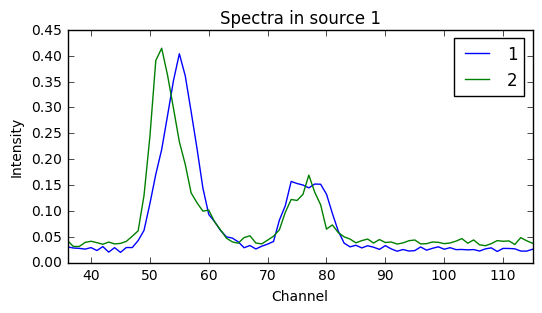

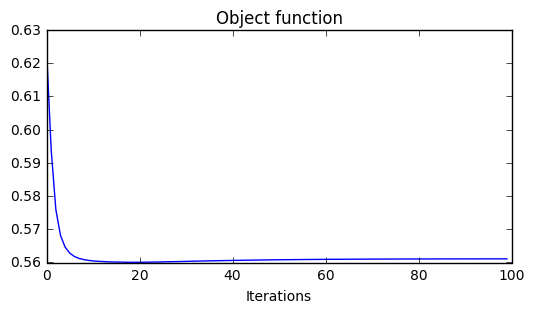

In [6]:
nmf_so.imshow_component(figsize=(6, 3))  # for 2D spactrum (Spectrum Imaging) dataset
# nmf.plot_component()   # for 1D spactrum dataset

nmf_so.plot_spectra(figsize=(6,3)) # plot decomposed spectra

nmf_so.plot_object_fun(figsize=(6,3)) # plot learnig curve (object function)